**Домашнее задание к лекции «Корреляция и корреляционный анализ»**

Возьмите датасет Mortality and Water Hardness**
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

**Задание 1.**

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [216]:
water = pd.read_csv('water.csv', usecols=range(1, 5))
water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [217]:
water.shape

(61, 4)

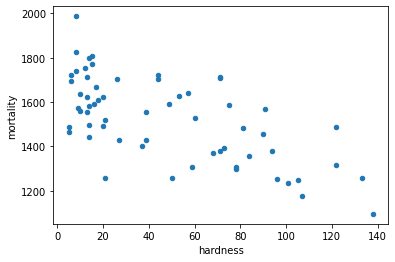

In [218]:
water.plot(kind='scatter', y='mortality', x='hardness')
plt.show()

In [219]:
# считаем коэф. корреляции Пирсона
water[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [220]:
# считаем коэф. корреляции Спирмана
water[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [221]:
X =water[['hardness']]
y =water['mortality']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33)

In [223]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [224]:
model.coef_

array([-3.1069652])

In [225]:
model.intercept_

1671.5331689377285

In [226]:
y_pred = model.predict(X_test)
y_pred

array([1506.86401326, 1621.82172571, 1624.92869091, 1640.46351692,
       1624.92869091, 1460.25953523, 1628.03565612, 1652.89137773,
       1609.39386491, 1640.46351692, 1590.7520737 , 1628.03565612,
       1615.60779531, 1516.18490886, 1618.71476051, 1242.77197113,
       1379.47843999, 1631.14262132, 1450.93863963])

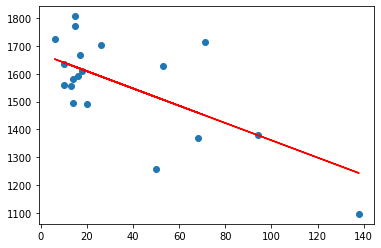

In [227]:
plt.scatter(y=y_test, x=X_test)
plt.plot(X_test, y_pred, c='r')

In [228]:
# находим коэфф. детерминации
model.score(X_test, y_test)

0.485777912139001

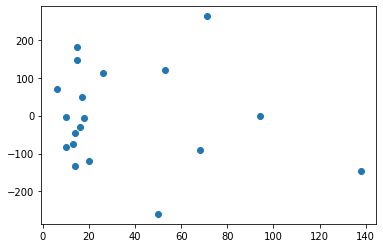

In [229]:
# Проведем анализ остатков
y_res = y_test-y_pred
plt.scatter(y=y_res, x=X_test)

(array([1., 2., 4., 5., 1., 3., 2., 1.]),
 array([-259.18490886, -194.02912521, -128.87334155,  -63.7175579 ,
           1.43822575,   66.59400941,  131.74979306,  196.90557672,
         262.06136037]),
 <a list of 8 Patch objects>)

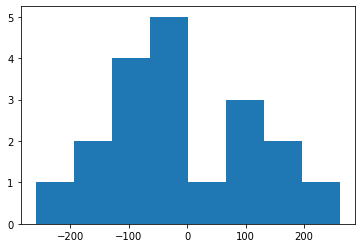

In [235]:
# Остатки имеют распределение близкое к нормальному, с провалом значений в области от 0 до 70
plt.hist(y_res, bins=8)

In [178]:
# Наблюдается умеренно выраженная отрицательная корреляция между среднегодовой смертностью и жесткостью питьевой воды
# Чем выше жесткость воды, тем ниже смертность


**Задание 2.**

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [179]:
water_south = water[water['location']=='South']
water_south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


In [180]:
water_north = water[water['location']=='North']
water_north.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


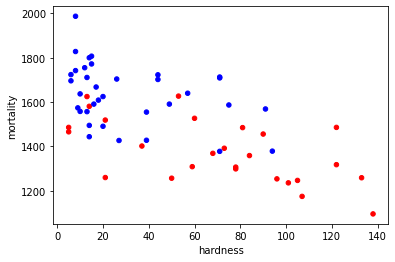

In [181]:
water_south['color']= "red"
water_north['color']= "blue"

water_s_and_n = pd.concat([water_south, water_north])
water_s_and_n.plot(kind='scatter', y='mortality', x='hardness', c=water_s_and_n['color'])

plt.show()

In [182]:
# считаем коэф. корреляции Пирсона
water_south[['mortality', 'hardness']].corr()


,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [183]:
water_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [184]:
# считаем коэф. корреляции Спирмана
water_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [185]:
water_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [186]:
# По коэф. корреляции можно предположить, что взаимосвязь 
# смертности и жесткости воды для южных городов более выраженная, чем для северных городов


In [187]:
# Построим модель линейной регрессии для южных городов
X =water_south[['hardness']]
y =water_south['mortality']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33)

In [189]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [190]:
model.coef_

array([-1.53420777])

In [191]:
model.intercept_

1458.3015508939286

In [192]:
y_pred = model.predict(X_test)
y_pred

array([1438.35684991, 1366.24908481, 1294.1413197 , 1426.08318776,
       1346.30438382, 1401.53586347, 1376.98853918, 1271.12820318])

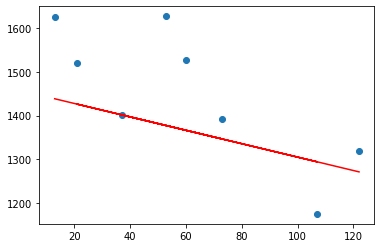

In [193]:
plt.scatter(y=y_test, x=X_test)
plt.plot(X_test, y_pred, c='r')

In [194]:
# находим коэфф. детерминации
model.score(X_test, y_test)

0.12278533289699844

In [195]:
# Согласно значению коэф. детерминации (близок к 0) можно сказать, что построенная регрессионная модель слабо 'описывает' зависимость данных

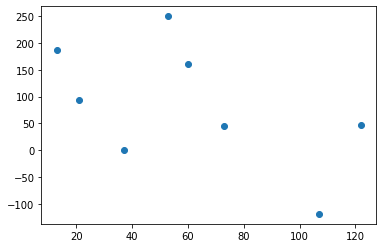

In [196]:
# Проведем анализ остатков
y_res = y_test-y_pred
plt.scatter(y=y_res, x=X_test)

(array([1., 3., 1., 3.]),
 array([-119.1413197 ,  -26.85312457,   65.43507056,  157.72326569,
         250.01146082]),
 <a list of 4 Patch objects>)

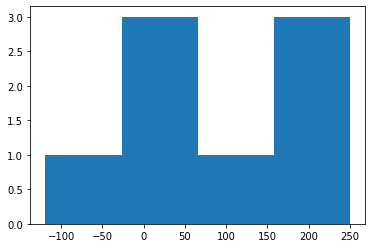

In [197]:
plt.hist(y_res, bins=4)

In [198]:
# Анализ остатков не может быть объективным по причине малого количества данных при тестировании

In [199]:
# Построим модель линейной регрессии для северных городов
X =water_north[['hardness']]
y =water_north['mortality']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33)

In [201]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [202]:
model.coef_

array([-1.9811188])

In [203]:
model.intercept_

1674.1277657153964

In [204]:
y_pred = model.predict(X_test)
y_pred

array([1654.31657773, 1561.20399418, 1533.468331  , 1658.27881533,
       1662.24105292, 1533.468331  , 1596.86413256, 1644.41098373,
       1644.41098373, 1642.42986493, 1533.468331  ])

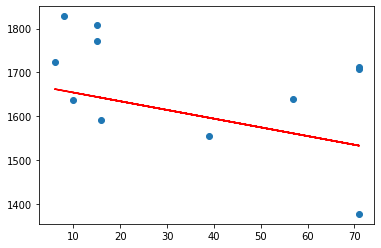

In [205]:
plt.scatter(y=y_test, x=X_test)
plt.plot(X_test, y_pred, c='r')

In [206]:
# находим коэфф. детерминации
model.score(X_test, y_test)

-0.03790458509832817

In [207]:
# Согласно значению коэф. детерминации (меньше 0) можно сказать, что регрессионная модель описывает взаимосвязь показателей хуже,
# чем средне арифметическое значение

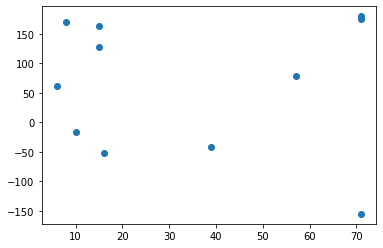

In [208]:
# Проведем анализ остатков
y_res = y_test-y_pred
plt.scatter(y=y_res, x=X_test)

(array([1., 1., 2., 1., 1., 5.]),
 array([-155.468331  ,  -99.63499767,  -43.80166433,   12.031669  ,
          67.86500233,  123.69833567,  179.531669  ]),
 <a list of 6 Patch objects>)

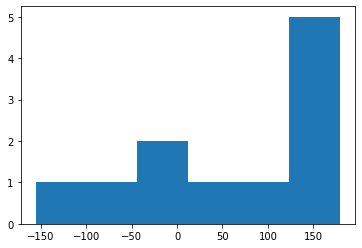

In [209]:
plt.hist(y_res, bins=6)

In [ ]:
# Делая общий вывод по 2й части задания можно сказать, что
# регрессионный анализ и построение линейной модели показали себя слабо в выявлении зависимостей
# предположительно по причине малого количества данных для проведения анализа.
# Однако на точечном графике наглядно можно заметить сохраняющийся тренд отрицательной корреляции между смертностью и жесткостью воды
# при чем в южных городах эта зависимость более равномерная и имеет больший размах по оси жесткости воды.